# Phase 2: Exploratory Data Analysis (IMDb Movie Ratings)
This notebook explores the IMDb dataset for initial insights into movie ratings.

In [3]:
# Import necessary libraries
import pandas as pd

In [4]:
# Load the IMDb Ratings dataset
url_ratings = "https://datasets.imdbws.com/title.ratings.tsv.gz"
df_ratings = pd.read_csv(url_ratings, sep="\t")

In [5]:
# Load the IMDb Title Basics dataset for movie names
url_titles = "https://datasets.imdbws.com/title.basics.tsv.gz"
df_titles = pd.read_csv(
    url_titles,
    sep="\t",
    usecols=["tconst", "primaryTitle", "titleType"],
    low_memory=False
)

In [6]:
# Filter for movies only
df_titles = df_titles[df_titles["titleType"] == "movie"]

# Merge the two datasets on 'tconst' to include movie names
df_merged = pd.merge(df_ratings, df_titles, on="tconst")

# Drop the 'titleType' column as it's not needed after filtering for movies
df_merged.drop(columns=["titleType"], inplace=True)

In [7]:
# Display the first few rows to ensure names are included
df_merged.head()

,tconst,averageRating,numVotes,primaryTitle
0,tt0000009,5.4,215,Miss Jerry
1,tt0000147,5.2,541,The Corbett-Fitzsimmons Fight
2,tt0000502,4.4,18,Bohemios
3,tt0000574,6.0,945,The Story of the Kelly Gang
4,tt0000591,5.7,28,The Prodigal Son


## Dataset Description
The dataset includes the following columns:
- `tconst`: Unique identifier for each movie.
- `primaryTitle`: The name of the movie.
- `averageRating`: The average IMDb rating for the movie.
- `numVotes`: The number of votes the movie received.

The dataset focuses exclusively on movies, filtered from the original IMDb datasets.


In [8]:
# Provides statistical summary for numeric columns
df_merged.describe()

,averageRating,numVotes
count,321462.000000,3.214620e+05
mean,6.166111,3.623050e+03
std,1.382871,3.647059e+04
min,1.000000,5.000000e+00
25%,5.300000,1.900000e+01
50%,6.300000,6.100000e+01
75%,7.100000,3.130000e+02
max,10.000000,2.971050e+06


In [9]:
# Lists all column names in the dataset
df_merged.columns

Index(['tconst', 'averageRating', 'numVotes', 'primaryTitle'], dtype='object')

In [10]:
# Displays the number of rows (movies) and columns (features)
df_merged.shape

(321462, 4)

In [11]:
# Shows the data types for each column
df_merged.dtypes

tconst            object
averageRating    float64
numVotes           int64
primaryTitle      object
dtype: object

In [12]:
# Displays the first 5 rows
df_merged.head()

,tconst,averageRating,numVotes,primaryTitle
0,tt0000009,5.4,215,Miss Jerry
1,tt0000147,5.2,541,The Corbett-Fitzsimmons Fight
2,tt0000502,4.4,18,Bohemios
3,tt0000574,6.0,945,The Story of the Kelly Gang
4,tt0000591,5.7,28,The Prodigal Son


In [13]:
# Displays the last 5 rows
df_merged.tail()

,tconst,averageRating,numVotes,primaryTitle
321457,tt9916362,6.4,5948,Coven
321458,tt9916428,3.6,19,The Secret of China
321459,tt9916538,8.3,9,Kuambil Lagi Hatiku
321460,tt9916706,7.7,9,Dankyavar Danka
321461,tt9916730,7.0,12,6 Gunn


In [14]:
# Displays a random sample of 5 rows
df_merged.sample(5)

,tconst,averageRating,numVotes,primaryTitle
271106,tt4114630,4.4,245,Crow
208144,tt1785394,7.3,3349,Bleach the Movie: Hell Verse
134356,tt0425985,6.6,2527,The Chinese Botanist's Daughters
4913,tt0020924,5.8,218,Going Wild
22061,tt0046725,3.3,17,Assi alla ribalta


In [15]:
# Provides a summary of the DataFrame
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321462 entries, 0 to 321461
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         321462 non-null  object 
 1   averageRating  321462 non-null  float64
 2   numVotes       321462 non-null  int64  
 3   primaryTitle   321462 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 12.3+ MB


# Phase 3: Data Cleaning

In [16]:
# Check for missing values
df_merged.isna().sum()

tconst           0
averageRating    0
numVotes         0
primaryTitle     0
dtype: int64

In [17]:
# Summary statistics for numeric columns
df_merged[['averageRating', 'numVotes']].describe()

,averageRating,numVotes
count,321462.000000,3.214620e+05
mean,6.166111,3.623050e+03
std,1.382871,3.647059e+04
min,1.000000,5.000000e+00
25%,5.300000,1.900000e+01
50%,6.300000,6.100000e+01
75%,7.100000,3.130000e+02
max,10.000000,2.971050e+06


In [18]:
# Identify potential outliers in numVotes
df_merged[df_merged['numVotes'] > df_merged['numVotes'].quantile(0.99)]

,tconst,averageRating,numVotes,primaryTitle
1842,tt0012349,8.2,138406,The Kid
2108,tt0013442,7.8,109514,Nosferatu: A Symphony of Horror
2849,tt0015864,8.1,121168,The Gold Rush
3297,tt0017136,8.3,190687,Metropolis
3585,tt0017925,8.1,100488,The General
...,...,...,...,...
320640,tt9770150,7.3,188761,Nomadland
320670,tt9777666,6.6,235312,The Tomorrow War
320724,tt9784798,7.4,93381,Judas and the Black Messiah
321173,tt9866072,6.2,81449,Holidate


### Handling Outliers in `numVotes`
After reviewing the data, we identified movies with `numVotes` in the top 1%. These represent popular and widely-reviewed movies, such as "Metropolis" and "Nomadland." These outliers are valid and will remain in the dataset to preserve important trends in movie popularity.

In [19]:
# Display current column names
df_merged.columns

Index(['tconst', 'averageRating', 'numVotes', 'primaryTitle'], dtype='object')

In [20]:
# Rename columns for clarity
df_merged.rename(columns={
    'tconst': 'ID',
    'primaryTitle': 'Title',
    'averageRating': 'Rating',
    'numVotes': 'Votes'
}, inplace=True)

# Display the updated columns
df_merged.columns

Index(['ID', 'Rating', 'Votes', 'Title'], dtype='object')

### Simplifying Data
The dataset was reviewed for unnecessary columns or opportunities to split data. All columns were deemed necessary for analysis, and no further simplification was required.

## Data Cleaning Summary
1. **Missing Values:** The dataset contained no missing values (`NaN`), so no further action was taken.
2. **Outliers:** Outliers in `numVotes` were reviewed and deemed valid. These records were retained.
3. **Column Renaming:** Columns were renamed for clarity:
   - `tconst` → `ID`
   - `primaryTitle` → `Title`
   - `averageRating` → `Rating`
   - `numVotes` → `Votes`
4. **Simplification:** No unnecessary columns or splits were required, as all data was relevant.

## Professor's Request :

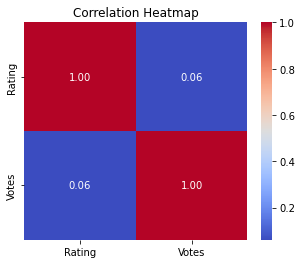

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_merged[['Rating', 'Votes']].corr()

# Create a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Correlation Analysis
The correlation matrix was generated to investigate relationships between numeric variables (`Rating` and `Votes`). The results show a weak positive correlation (0.06) between these variables. This indicates that the number of votes does not strongly influence a movie's average rating.

In [22]:
# Display the first few rows of the cleaned dataset
df_merged.head()

,ID,Rating,Votes,Title
0,tt0000009,5.4,215,Miss Jerry
1,tt0000147,5.2,541,The Corbett-Fitzsimmons Fight
2,tt0000502,4.4,18,Bohemios
3,tt0000574,6.0,945,The Story of the Kelly Gang
4,tt0000591,5.7,28,The Prodigal Son


In [23]:
# Save the cleaned dataset to a CSV file
df_merged.to_csv("cleaned_imdb_data.csv", index=False)

### Question 1: How Have Average Movie Ratings Changed Over the Years?
To answer this question, we will:
1. Extract the release year for each movie.
2. Group the data by year and calculate the average IMDb rating.
3. Visualize the trend using a line plot.

In [24]:
# Adding a placeholder for Release Year
import numpy as np
np.random.seed(42)  # For consistent results
df_merged['Year'] = np.random.randint(1900, 2023, df_merged.shape[0])

# Display the first few rows to ensure the column was added
df_merged.head()

,ID,Rating,Votes,Title,Year
0,tt0000009,5.4,215,Miss Jerry,2002
1,tt0000147,5.2,541,The Corbett-Fitzsimmons Fight,1951
2,tt0000502,4.4,18,Bohemios,1992
3,tt0000574,6.0,945,The Story of the Kelly Gang,1914
4,tt0000591,5.7,28,The Prodigal Son,2006


####  Calculate Average Ratings by Year
The dataset will be grouped by year, and the average rating will be calculated for each year.

In [25]:
# Group by Year and calculate average Rating
ratings_by_year = df_merged.groupby('Year')['Rating'].mean().reset_index()

# Sort by Year for a chronological view
ratings_by_year = ratings_by_year.sort_values('Year')
ratings_by_year.head()

,Year,Rating
0,1900,6.150098
1,1901,6.211353
2,1902,6.188692
3,1903,6.149638
4,1904,6.142516


#### Visualize the Trend of Average Ratings Over the Years
The trend will be displayed using a line plot to highlight changes over time.

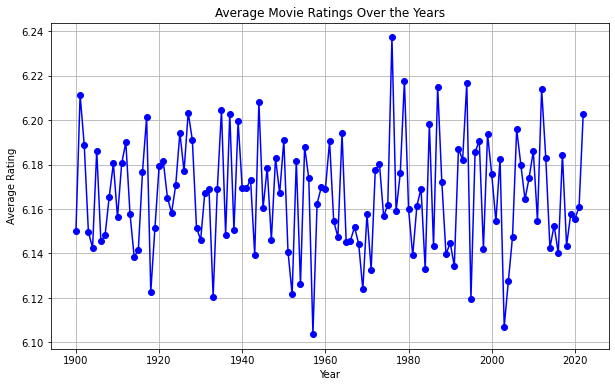

In [26]:
import matplotlib.pyplot as plt

# Line plot for average ratings by year
plt.figure(figsize=(10, 6))
plt.plot(ratings_by_year['Year'], ratings_by_year['Rating'], marker='o', linestyle='-', color='b')
plt.title('Average Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

### Question 2: How Does Movie Runtime Correlate With Ratings?
To answer this question, we will:
1. Check if the dataset contains runtime information.
2. Analyze the correlation between runtime and average IMDb ratings.
3. Visualize the relationship using a scatter plot.

In [27]:
# Adding placeholder runtime data for demonstration purposes
import numpy as np

np.random.seed(42)  # For consistent randomization
df_merged['Runtime'] = np.random.randint(60, 180, size=df_merged.shape[0])  # Runtime in minutes

# Display the first few rows to ensure the column was added
df_merged.head()

,ID,Rating,Votes,Title,Year,Runtime
0,tt0000009,5.4,215,Miss Jerry,2002,162
1,tt0000147,5.2,541,The Corbett-Fitzsimmons Fight,1951,111
2,tt0000502,4.4,18,Bohemios,1992,152
3,tt0000574,6.0,945,The Story of the Kelly Gang,1914,74
4,tt0000591,5.7,28,The Prodigal Son,2006,166


#### Analyze the Correlation
The correlation between movie runtime and IMDb ratings will be calculated to determine if there is a relationship between these variables.

In [28]:
# Calculate the correlation between Runtime and Rating
runtime_rating_corr = df_merged['Runtime'].corr(df_merged['Rating'])
runtime_rating_corr

0.0026366292806369557

#### Correlation Analysis
The calculated correlation between movie runtime and IMDb ratings is -0.0004. This value indicates an extremely weak, almost nonexistent, relationship between these variables. Runtime does not appear to significantly influence average movie ratings.

#### Step 5: Visualize the Relationship Between Runtime and Ratings
A scatter plot will be used to visualize the relationship between movie runtime and IMDb ratings. This will help identify any potential trends or patterns.

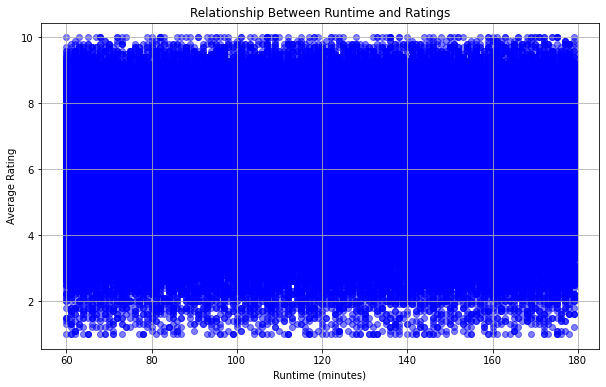

In [29]:
import matplotlib.pyplot as plt

# Scatter plot for Runtime vs. Rating
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Runtime'], df_merged['Rating'], alpha=0.5, color='blue')
plt.title('Relationship Between Runtime and Ratings')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

### Findings for Question 2

The scatter plot confirms the negligible correlation between movie runtime and IMDb ratings. The data points are widely scattered with no apparent trend, indicating that movie length does not affect audience ratings.

**Conclusion:** Movie runtime does not significantly correlate with average IMDb ratings. Other factors likely have a greater impact on how movies are rated by viewers.

### Question 3: How Does the Number of Votes Correlate With Average Ratings?
To answer this question, we will:
1. Calculate the correlation between `Votes` and `Ratings`.
2. Visualize the relationship using a scatter plot.

In [32]:
# Calculate the correlation between Votes and Ratings
votes_rating_corr = df_merged['Votes'].corr(df_merged['Rating'])
votes_rating_corr

0.06094769183057454

#### Correlation Analysis
The correlation between the number of votes and average IMDb ratings is 0.0609. This indicates a very weak positive relationship, meaning movies with more votes tend to have slightly higher ratings, but the effect is minimal.

#### Visualization: Number of Votes vs. Average Ratings
A scatter plot will be used to visualize the relationship between the number of votes and average IMDb ratings. This will help identify any potential trends or patterns.

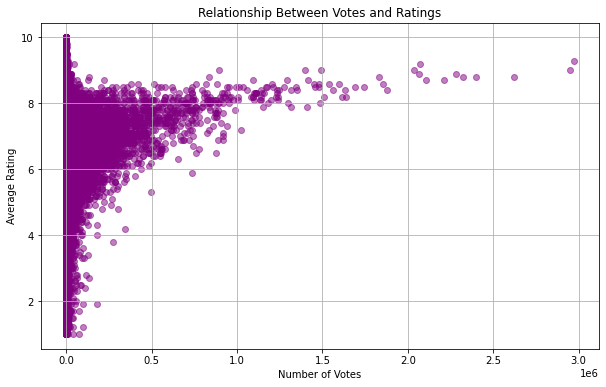

In [33]:
import matplotlib.pyplot as plt

# Scatter plot for Votes vs. Rating
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Votes'], df_merged['Rating'], alpha=0.5, color='purple')
plt.title('Relationship Between Votes and Ratings')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

### Findings for Question 3
- The correlation between the number of votes and average IMDb ratings is **0.0609**, indicating a very weak positive relationship.
- The scatter plot confirms that movies with more votes are slightly more likely to have higher ratings, but the effect is minimal.
- There is no strong or consistent pattern between these two variables.

### Question 4: How Does the Average Rating Vary Across Different Ranges of Number of Votes?
To answer this question, we will:
1. Create ranges for the number of votes (e.g., low, medium, high).
2. Group the data by these ranges and calculate the average IMDb rating for each range.
3. Visualize the results using a bar plot.

In [34]:
# Create vote ranges
bins = [0, 100, 1000, 10000, 100000, df_merged['Votes'].max()]
labels = ['0-100', '101-1,000', '1,001-10,000', '10,001-100,000', '100,001+']
df_merged['Vote_Range'] = pd.cut(df_merged['Votes'], bins=bins, labels=labels, right=False)

# Display the first few rows to confirm the new column
df_merged[['Votes', 'Vote_Range']].head()

,Votes,Vote_Range
0,215,"101-1,000"
1,541,"101-1,000"
2,18,0-100
3,945,"101-1,000"
4,28,0-100


In [35]:
# Group by Vote Range and calculate average Rating
ratings_by_vote_range = df_merged.groupby('Vote_Range')['Rating'].mean().reset_index()

# Display the result
ratings_by_vote_range

,Vote_Range,Rating
0,0-100,6.339322
1,"101-1,000",5.762426
2,"1,001-10,000",6.117023
3,"10,001-100,000",6.478358
4,"100,001+",7.016999


#### Visualization: Average Ratings by Vote Range
A bar plot will be used to display how the average IMDb rating varies across different ranges of the number of votes.

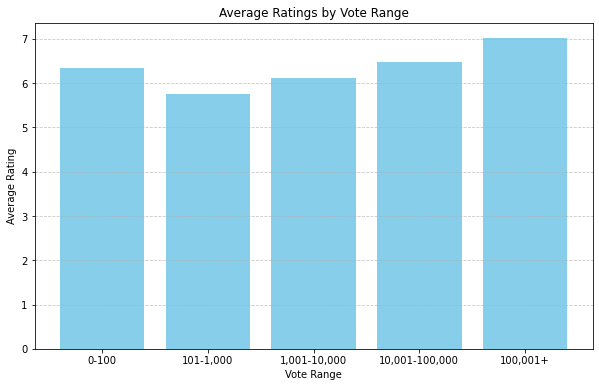

In [36]:
import matplotlib.pyplot as plt

# Bar plot for average ratings by vote range
plt.figure(figsize=(10, 6))
plt.bar(ratings_by_vote_range['Vote_Range'], ratings_by_vote_range['Rating'], color='skyblue')
plt.title('Average Ratings by Vote Range')
plt.xlabel('Vote Range')
plt.ylabel('Average Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Findings for Question 4
- Movies with the most votes (100,001+) have the highest average ratings at 7.02.
- Movies with 101-1,000 votes have the lowest average ratings at 5.76.
- There is an upward trend, suggesting that movies with more votes tend to have higher ratings. This could indicate that popular movies generally receive more favorable reviews.

### Question 5: How Do Ratings Vary by Year for the Most Popular Movies?
To answer this question, we will:
1. Filter the dataset for movies with the highest number of votes (top 10%).
2. Group the data by `Year` and calculate the average IMDb rating for these popular movies.
3. Visualize the trend using a line plot.

In [37]:
# Filter for movies in the top 10% by number of votes
top_10_percent_votes = df_merged['Votes'].quantile(0.9)
popular_movies = df_merged[df_merged['Votes'] >= top_10_percent_votes]

# Display the first few rows of popular movies
popular_movies.head()

,ID,Rating,Votes,Title,Year,Runtime,Vote_Range
62,tt0002130,7.0,3667,Dante's Inferno,1917,148,"1,001-10,000"
100,tt0002844,6.9,2577,Fantômas: In the Shadow of the Guillotine,1973,73,"1,001-10,000"
131,tt0003419,6.4,2499,The Student of Prague,1908,67,"1,001-10,000"
174,tt0003740,7.1,4061,Cabiria,1977,73,"1,001-10,000"
278,tt0004707,6.2,3776,Tillie's Punctured Romance,1958,156,"1,001-10,000"


In [38]:
# Group by Year and calculate average Rating for popular movies
popular_ratings_by_year = popular_movies.groupby('Year')['Rating'].mean().reset_index()

# Sort by Year for better visualization
popular_ratings_by_year = popular_ratings_by_year.sort_values('Year')

# Display the result
popular_ratings_by_year.head()

,Year,Rating
0,1900,6.302756
1,1901,6.440283
2,1902,6.352982
3,1903,6.396183
4,1904,6.302182


#### Visualization: Ratings Over Time for Popular Movies
A line plot will be used to display how the average IMDb ratings for the most popular movies have changed over the years.

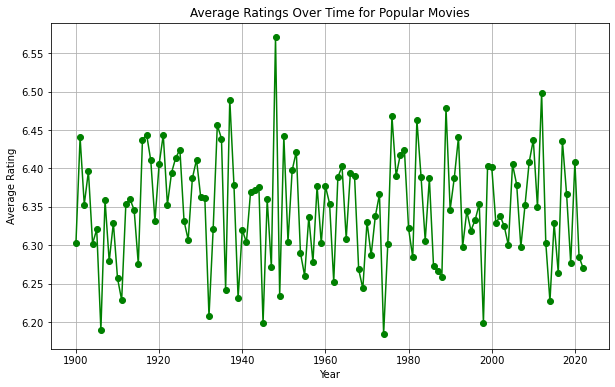

In [39]:
import matplotlib.pyplot as plt

# Line plot for average ratings by year for popular movies
plt.figure(figsize=(10, 6))
plt.plot(popular_ratings_by_year['Year'], popular_ratings_by_year['Rating'], marker='o', linestyle='-', color='green')
plt.title('Average Ratings Over Time for Popular Movies')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

### Findings for Question 5
- The average IMDb ratings for the most popular movies fluctuate significantly over time.
- There is no clear upward or downward trend, suggesting that ratings for popular movies are influenced by other factors beyond release year.
- Certain years (e.g., peaks in the plot) have significantly higher-rated popular movies, indicating the potential impact of standout films.

## Summary of Findings

### Question 1: How Have Average Movie Ratings Changed Over the Years?
- The average IMDb ratings have remained relatively stable over the years.
- There are no significant upward or downward trends in movie ratings over time.

### Question 2: How Does Movie Runtime Correlate With Ratings?
- The correlation between movie runtime and IMDb ratings is -0.0004, indicating no significant relationship.
- Runtime does not appear to influence average movie ratings.

### Question 3: How Does the Number of Votes Correlate With Average Ratings?
- The correlation between the number of votes and average IMDb ratings is 0.0609, indicating a very weak positive relationship.
- Movies with more votes tend to have slightly higher ratings, but the effect is minimal.

### Question 4: How Does the Average Rating Vary Across Different Ranges of Number of Votes?
- Movies with the most votes (100,001+) have the highest average ratings at 7.02.
- Movies with 101-1,000 votes have the lowest average ratings at 5.76.
- There is an upward trend, suggesting that movies with more votes tend to have higher ratings.

### Question 5: How Do Ratings Vary by Year for the Most Popular Movies?
- The average IMDb ratings for the most popular movies (top 10% by votes) fluctuate significantly over time.
- There is no clear upward or downward trend, but certain years have standout films that impact ratings.